# LAB 12 : DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

## Introduction

DBSCAN is a density-based clustering algorithm that groups together closely packed points based on two parameters: **epsilon** (&#949;) and **minimum samples**. It is particularly effective in identifying clusters of arbitrary shapes and handling noise in the data.

## Algorithm Steps

1. **Core Point Identification**: Find core points by identifying data points within a distance of &#949; from at least (<b>min_samples</b>) other points.
2. **Density-Reachability**: Determine density-reachable points by recursively visiting and adding points within &#949; distance from core points.
3. **Cluster Formation**: Form clusters from the density-reachable points. If a core point is connected to another core point, they belong to the same cluster. Otherwise, a new cluster is formed.
4. **Noise Handling**: Assign noise points to their own cluster or remove them from the analysis.

## Key Parameters

- **epsilon** (&#949;) (eps): The maximum distance between two samples for them to be considered as in the same neighborhood.
- **min_samples**: The number of samples in a neighborhood for a point to be considered as a core point.

## Theory

- **Core Points**: Points within the &#949;-neighborhood of at least (<b>min_samples</b>) other points.
- **Border Points**: Points within the &#949;-neighborhood of a core point but not core themselves.
- **Noise Points**: Points that are neither core nor border points.

## Formulas

- **Euclidean Distance**:

$$ d(\mathbf{p}, \mathbf{q}) = \sqrt{\sum_{i=1}^{n} (p_i - q_i)^2} $$

## Advantages

- DBSCAN can find arbitrarily shaped clusters.
- It does not require the number of clusters to be specified in advance.
- Robust to outliers and noise.

## Disadvantages

- Sensitivity to the choice of parameters **epsilon** (&#949;) and **min_samples**.
- Difficulty in clustering datasets with varying densities.

## Applications

- Image segmentation
- Anomaly detection
- Geographic data analysis


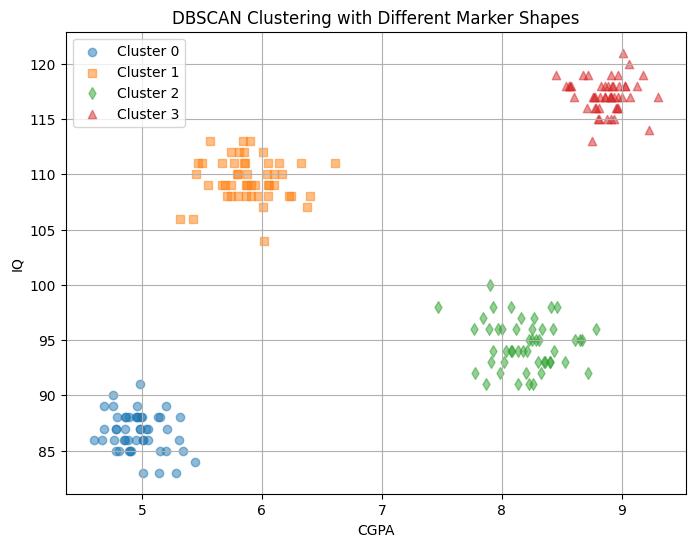

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('student_clustering.csv')

# Prepare the data
X = df[['cgpa', 'iq']].values

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # You can adjust these parameters
dbscan.fit(X_scaled)

# Visualize the clusters with different shapes
plt.figure(figsize=(8, 6))

# Define marker shapes
marker_shapes = ['o', 's', 'd', '^', 'x', '+', '*', 'h', 'p']

# Plot points for each cluster with different shapes
for label in np.unique(dbscan.labels_):
    if label == -1:  # Noise points have label -1
        plt.scatter(X[dbscan.labels_ == label, 0], X[dbscan.labels_ == label, 1], c='black', marker='x', label='Noise', alpha=0.5)
    else:
        plt.scatter(X[dbscan.labels_ == label, 0], X[dbscan.labels_ == label, 1], marker=marker_shapes[label % len(marker_shapes)], label=f'Cluster {label}', alpha=0.5)

plt.title('DBSCAN Clustering with Different Marker Shapes')
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.legend()
plt.grid(True)
plt.show()
